## **API**

Buatlah API untuk:
- `Menampilkan` seluruh entry data setelah dilakukan handling outlier.
- `Menghapus` entry data, dari data yang telah dihandling outlier.

clue:
- Load data csv yang sudah diolah dengan pandas, kemudian konversi data ke dictionary `df.to_dict()` atau json `df.to_json()` untuk dapat diolah lebih lanjut dengan API menggunakan FastAPI.
- Pembuatan API dilakukan pada script `.py`
- Endpoint dan penamaan function pada API dibebaskan.



# ASSIGNMENT : 
Perusahaan peminjaman sepeda di San Fransisco memintamu untuk menganalisa durasi perjalanan customer mereka. Untuk memudahkan analisa, lakukan hal-hal berikut ini:

In [ ]:
# Working area
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

auth.authenticate_user()
print('Authenticated')


project_id = "hacktiv8-435414" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING



syn = """SELECT duration_sec FROM`bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` LIMIT 3000

"""

df = client.query(syn).to_dataframe()
df.to_csv('/content/drive/My Drive/mydata.csv', index=False)

df

In [40]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, html
import numpy as np

C:\Users\handw\AppData\Local\Temp\ipykernel_206204\2314149309.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, html


In [41]:

df = pd.read_csv('mydata.csv')
df

,duration_sec
0,2532
1,623
2,540
3,585
4,451
...,...
2995,1205
2996,1104
2997,198
2998,957


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   duration_sec  3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [4]:
df.nunique()

duration_sec    1198
dtype: int64

In [5]:
df.isna().sum()

duration_sec    0
dtype: int64

In [6]:
#df = df.drop_duplicates()
df

,duration_sec
0,2532
1,623
2,540
3,585
4,451
...,...
2995,1205
2996,1104
2997,198
2998,957


## **STATISTIK DESKRIPTIF**



### 1. Lakukan perhitungan central tendency (mean, median, dan modus).


In [42]:
#syntax ini digunakan untuk menghitung nilai rata-rata, median, dan modus dari duration_sec
print (f"Average of duration_sec : {df['duration_sec'].mean()} sec")
print (f"Median of duration_sec : {df['duration_sec'].median()} sec")
print (f"Mode of duration_sec : {df['duration_sec'].mode().values[0]} sec")

Average of duration_sec : 897.2766666666666 sec
Median of duration_sec : 506.5 sec
Mode of duration_sec : 220 sec


##### Insight : Central Tendency
Berdasarkan hasil perhitungan data awal, diketahui bahwa Rata-rata durasi peminjaman sepeda adalah 897.2766666666666 detik, dengan nilai median sebesar 506.5 detik, dan modus senilai 220 detik

In [43]:
#Syntax ini digunakan untuk menampilkan 15 baris data denggan nilai yang paling sering muncul
df['duration_sec'].value_counts().head(15)

duration_sec
220    12
325    12
224    11
427     9
597     9
201     9
623     9
490     8
254     8
187     8
488     8
219     8
223     8
283     8
251     8
Name: count, dtype: int64

##### Insight 
Berdasarkan hasil output diatas, dapat dilihat bahwa nilai 220 muncul sebanyak 12 kali pada data, data ini sebagai validasi bahwa nilai modus dari duration_sec sudah sesuai

In [44]:
# syntax ini digunakan untuk menampilkan data dimulai dengan baris yang memiliki nilai tertinggi
df['duration_sec'].sort_values(ascending=False)

1185    84857
1288    57671
2271    57519
2626    55240
2102    53298
        ...  
2315       86
2720       84
2314       81
1234       73
2530       66
Name: duration_sec, Length: 3000, dtype: int64

##### Insight
Pada bagian ini, dapat dilihat bahwa terdapat beberapa baris yang memiliki angka cukup besar dari angka yang lainnya, sehingga perlu dilakukan pemeriksaan apakah terdapat data Outlier pada dataset ini

### 2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range).

In [45]:
range = df['duration_sec'].max() - df['duration_sec'].min()
print (f"Range of duration_sec : {range}")
print (f"Range of duration_sec from {df['duration_sec'].min()} to {df['duration_sec'].max()}")

Range of duration_sec : 84791
Range of duration_sec from 66 to 84857


In [29]:
variance = df['duration_sec'].var()
print (f"Variance of duration_sec : {variance}")

Variance of duration_sec : 10705096.701022575


In [46]:
print (f"{np.sqrt(df['duration_sec'].var())}")

std = df['duration_sec'].std()
print (f"standard deviation of duration_sec: {std}")

3271.864407493467
standard deviation of duration_sec: 3271.864407493467



### 3. Lakukan pengecekan skewness dan kurtosis.

In [47]:
print(f"Skewness: {df['duration_sec'].skew()}")

Skewness: 16.101026386710053


##### Insight
Berdasarkan perhitungan skewness, dimana hasilnya lebih besar dari 0.05, terdapat indikasi data Outlier pada dataset ini

In [48]:
print(f"Kurtosis: {df['duration_sec'].kurtosis()}")

Kurtosis: 301.7823931823024



### 3. Analisa apakah ada data outlier berdasarkan sebaran datanya.

In [51]:
q1 = df['duration_sec'].quantile(0.25)
q2 = df['duration_sec'].quantile(0.5)
q3 = df['duration_sec'].quantile(0.75)

iqr = q3 - q1

low_bound = q1 - 1.5 * iqr
up_bound = q3 + 1.5 * iqr

print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)
print(f'Lower Boundaries : {low_bound}')
print(f'Upper Boundaries : {up_bound}')
print (f"Max. Value : {df['duration_sec'].max()}")
print(f'Min. Value : {df['duration_sec'].min()}')

Q1: 312.5
Q2: 506.5
Q3: 809.0
Interquartile Range (IQR): 496.5
Lower Boundaries : -432.25
Upper Boundaries : 1553.75
Max. Value : 84857
Min. Value : 66


##### Insight : 
Berdasarkan perhitungan Q1, Q2, Q3, IQR, diketahui bahwa batas bawah adalah -432.25, sedangkan batas tertinggi adalah 1553.75. Sedangkan di dalam dataset, terdapat data yang memiliki nilai lebih besar dari batas atas tersebut, sehingga dapat dipastikan dataset ini memiliki Outlier


### 4. Cari tahu berapa persentase outlier terhadap data keseluruhan.

In [53]:
outlier = df['duration_sec'][(df['duration_sec']<low_bound) | (df['duration_sec']>up_bound)]
no_outlier = df['duration_sec'][(df['duration_sec']>=low_bound) & (df['duration_sec']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df['duration_sec']):.2f}%%')
print(f'Percentage of no outliers: {len(no_outlier)*100/len(df['duration_sec']):.2f}%%')

Percentage of outliers: 5.87%%
Percentage of no outliers: 94.13%%


##### Insight : 
Setelah diketahui bahwa terdapat Outlier, maka dilakukan kembali penghitungan untuk mengetahui jumlah data yang tidak normal, hasilnya adalah 5.87% data adalah Outlier


### 5. Bagaimana perubahan pemusatan data sebelum dan sesudah penghapusan outlier?

##### Sebelum penghapusan Outlier

<Axes: ylabel='Frequency'>

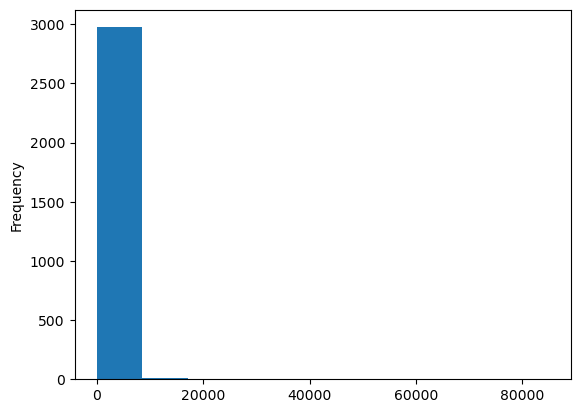

In [ ]:
df['duration_sec'].plot(kind='hist', bins=10)

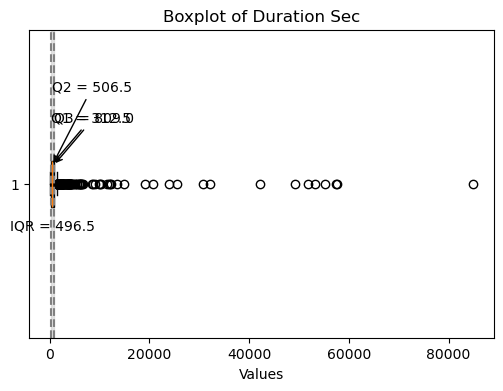

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['duration_sec'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Duration Sec')

plt.show()

<Axes: >

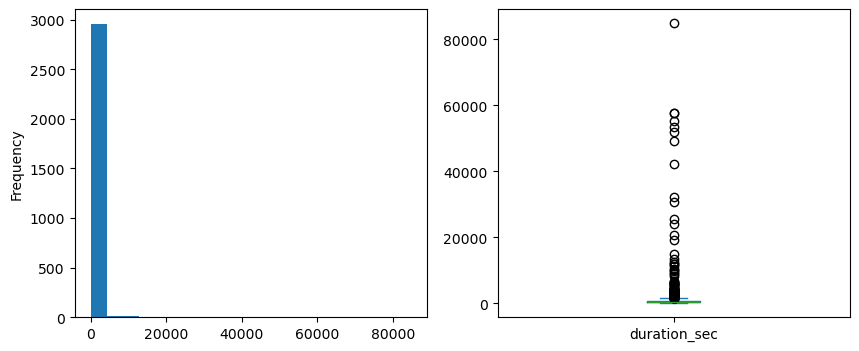

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['duration_sec'].plot(kind='hist',bins=20,ax=ax[0])
df['duration_sec'].plot(kind='box',ax=ax[1])

##### Insight : Sebelum penghapusan Outlier
Berdasarkan grafik di atas, terlihat bahwa data yang Outlier sangat mempengaruhi grafik yang ditampilkan, sehingga sangat diperlukan penghapusan outlier untuk mendapatkan data yang akurat

##### Sesudah Penghapusan Outlier

In [54]:
#syntax ini digunakan untuk menghapus baris yang memiliki nilai outlier
df = df.query('duration_sec < 1553.75')
df

,duration_sec
1,623
2,540
3,585
4,451
5,518
...,...
2994,1267
2995,1205
2996,1104
2997,198


##### Insight
Setelah dilakukan penghapusan data yang Outlier, tersisa 2824 baris data dari awalnya 3000 data

In [55]:
outlier = df['duration_sec'][(df['duration_sec']<low_bound) | (df['duration_sec']>up_bound)]
no_outlier = df['duration_sec'][(df['duration_sec']>=low_bound) & (df['duration_sec']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df['duration_sec']):.2f}%%')
print(f'Percentage of no outliers: {len(no_outlier)*100/len(df['duration_sec']):.2f}%%')

Percentage of outliers: 0.00%%
Percentage of no outliers: 100.00%%


##### Insight
Dilakukan pengetesan jumlah persentase outlier kembali, dan hasilnya sudah 100% data bukan Outlier

In [56]:
print(f"Skewness: {df['duration_sec'].skew()}")

Skewness: 0.9029556039011407


In [57]:
print(f"Kurtosis: {df['duration_sec'].kurtosis()}")

Kurtosis: 0.22955851508730074


<Axes: ylabel='Frequency'>

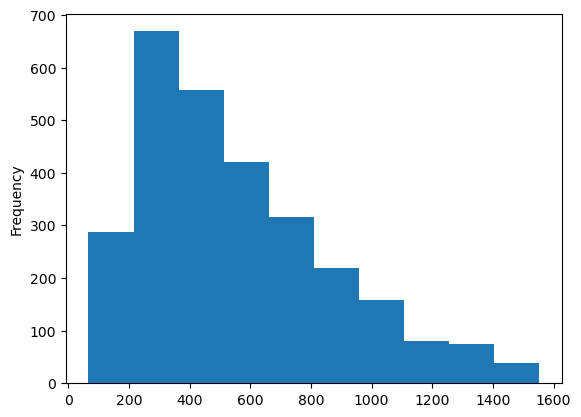

In [ ]:
df['duration_sec'].plot(kind='hist', bins=10)

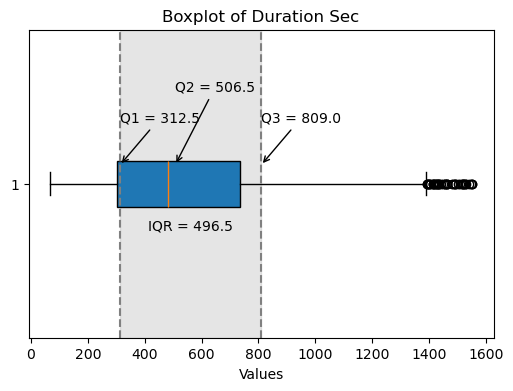

In [59]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['duration_sec'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Duration Sec')

plt.show()

<Axes: >

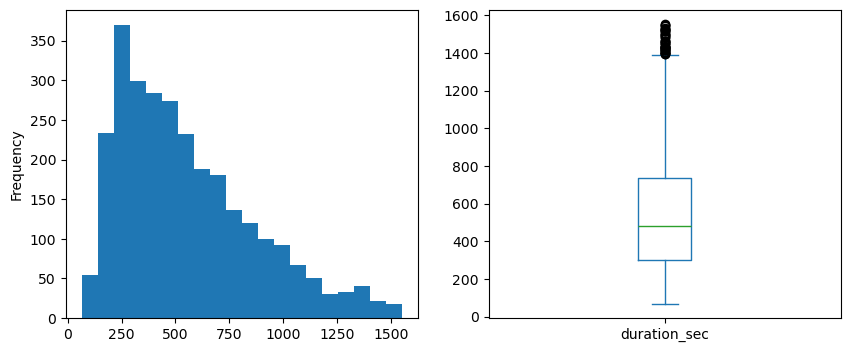

In [60]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['duration_sec'].plot(kind='hist',bins=20,ax=ax[0])
df['duration_sec'].plot(kind='box',ax=ax[1])

In [61]:
print (f"Average of duration_sec : {df['duration_sec'].mean()} sec")
print (f"Median of duration_sec : {df['duration_sec'].median()} sec")
print (f"Mode of duration_sec : {df['duration_sec'].mode().values[0]} sec")

Average of duration_sec : 554.3820821529745 sec
Median of duration_sec : 481.0 sec
Mode of duration_sec : 220 sec


##### Insight : Data setelah dilakukan penghapusan Outlier
Setelah Outlier dihapus, maka dapat diperoleh data yang akurat dengan kesimpulan : 
Rata-rata peminjaman sepeda adalah selama 554 detik, median 481 detik, dan durasi yang paling sering adalah sebanyak 220 detik


##### Export to CSV


In [62]:
df.to_csv('clean_data.csv', index=False)